# **Question 1** -

### Define the annual variation as the maximum annual value minus the minimum annual value from the raw data and calculate the mean annual variability during the first half of the record and compare that to the value from the second half of the record. Is the difference significant at the 95% confidence limits?

## Loading of Data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statistics
from math import sqrt

In [2]:
keeling_curve = pd.read_excel('./Downloads/monthly_in_situ_co2_mlo (1).xls')
keeling_curve.head()

,monthly_in_situ_co2_mlo,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9
0,Ω,1,21200,1958.0411,-99.99,-99.99,-99.99,-99.99,-99.99,-99.99
1,1958,2,21231,1958.1260,-99.99,-99.99,-99.99,-99.99,-99.99,-99.99
2,1958,3,21259,1958.2027,315.71,314.43,316.20,314.91,315.71,314.43
3,1958,4,21290,1958.2877,317.45,315.16,317.30,314.99,317.45,315.16
4,1958,5,21320,1958.3699,317.51,314.70,317.88,315.06,317.51,314.70


In [3]:
type(keeling_curve)

pandas.core.frame.DataFrame

## Cleaning of Data

In [4]:
keeling_curve.columns

Index(['monthly_in_situ_co2_mlo', 'Unnamed: 1', 'Unnamed: 2', 'Unnamed: 3',
       'Unnamed: 4', 'Unnamed: 5', 'Unnamed: 6', 'Unnamed: 7', 'Unnamed: 8',
       'Unnamed: 9'],
      dtype='object')

In [5]:
keeling_curve = keeling_curve.drop([0, 1,778,779], axis=0)

In [6]:
keeling_curve = keeling_curve[['monthly_in_situ_co2_mlo','Unnamed: 1','Unnamed: 8']]

In [7]:
keeling_curve

,monthly_in_situ_co2_mlo,Unnamed: 1,Unnamed: 8
2,1958,3,315.71
3,1958,4,317.45
4,1958,5,317.51
5,1958,6,317.26
6,1958,7,315.87
...,...,...,...
773,2022,6,420.68
774,2022,7,418.68
775,2022,8,416.76
776,2022,9,415.41


In [8]:
keeling_curve = keeling_curve.rename(columns={
    'monthly_in_situ_co2_mlo': 'Year',
    'Unnamed: 1': 'Months',
    'Unnamed: 8': 'Monthly mean CO2 concentration'
})

In [9]:
keeling_curve

,Year,Months,Monthly mean CO2 concentration
2,1958,3,315.71
3,1958,4,317.45
4,1958,5,317.51
5,1958,6,317.26
6,1958,7,315.87
...,...,...,...
773,2022,6,420.68
774,2022,7,418.68
775,2022,8,416.76
776,2022,9,415.41


In [10]:
keeling_curve.describe()

,Months,Monthly mean CO2 concentration
count,776.000000,776.000000
mean,6.500000,357.390129
std,3.444303,30.402324
min,1.000000,312.420000
25%,4.000000,329.685000
50%,6.500000,353.625000
75%,9.000000,382.020000
max,12.000000,420.770000


/Users/ss4338/opt/anaconda3/lib/python3.9/site-packages/pandas/core/indexes/base.py:6999: FutureWarning: In a future version, the Index constructor will not infer numeric dtypes when passed object-dtype sequences (matching Series behavior)
  return Index(sequences[0], name=names)


<AxesSubplot:xlabel='Year'>

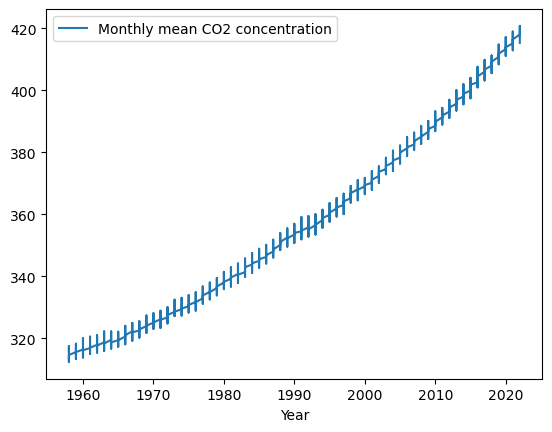

In [11]:
keeling_curve.plot(x = 'Year', y = 'Monthly mean CO2 concentration')

## Calculation of annual variation and mean annual variabilty

In [12]:
keeling_curve.head()

,Year,Months,Monthly mean CO2 concentration
2,1958,3,315.71
3,1958,4,317.45
4,1958,5,317.51
5,1958,6,317.26
6,1958,7,315.87


In [13]:
keeling_curve.isnull().sum()

Year                              0
Months                            0
Monthly mean CO2 concentration    0
dtype: int64

In [14]:
keeling_curve.iloc[0]

Year                                1958
Months                                 3
Monthly mean CO2 concentration    315.71
Name: 2, dtype: object

In [15]:
keeling_curve[keeling_curve['Year']==1958].index

Int64Index([2, 3, 4, 5, 6, 7, 8, 9, 10, 11], dtype='int64')

In [16]:
index = keeling_curve.loc[keeling_curve['Year']==1958].index


In [17]:
keeling_curve.loc[index,'Monthly mean CO2 concentration']

2     315.71
3     317.45
4     317.51
5     317.26
6     315.87
7     314.93
8     313.21
9     312.42
10    313.33
11    314.67
Name: Monthly mean CO2 concentration, dtype: float64

In [18]:
unique_years = set(keeling_curve['Year'])
len(unique_years)

65

In [19]:
index_list = []

for year in unique_years:
    indexes = keeling_curve[keeling_curve['Year'] == year].index
    index_list.append(indexes)

In [20]:
annual_variability = []
for index in index_list:
    ann_var = keeling_curve.loc[index, 'Monthly mean CO2 concentration'].max(
    ) - keeling_curve.loc[index, 'Monthly mean CO2 concentration'].min()
    annual_variability.append(ann_var)

In [21]:
# plt.plot(unique_years, annual_variability)
unique_years = list(unique_years)

In [22]:
half_year = int((len(unique_years)-1)/2)

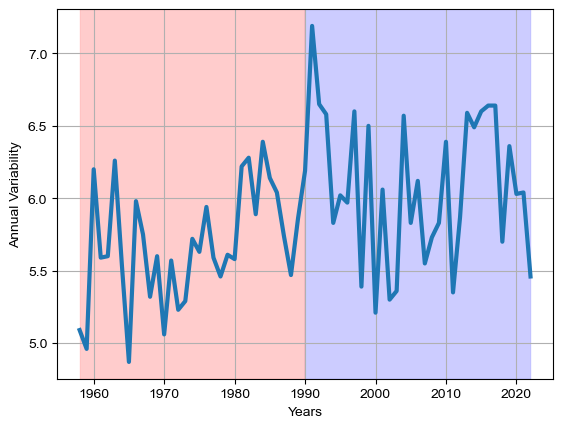

In [23]:
#ploting of two list using matplotlib
# plt.figure(facecolor = 'gray')
plt.plot(unique_years, annual_variability, linewidth = 3)
plt.xlabel('Years')
plt.ylabel('Annual Variability')
plt.style.use('seaborn')
plt.grid()
plt.axvspan(unique_years[0], unique_years[half_year], color='red', alpha=0.2)
plt.axvspan(unique_years[half_year], unique_years[len(unique_years)-1], color='blue', alpha=0.2)
plt.show()


In [24]:
annual_variability = np.array(annual_variability)

### Calculate the mean annual variability during the first half of the record and compare that to the value from the second half of the record.

In [25]:
first_half_mean_annual_variabilty = annual_variability[0:half_year].mean()
first_half_mean_annual_variabilty = np.repeat(first_half_mean_annual_variabilty, len(unique_years[0:half_year]))


In [26]:
first_half_mean_annual_variabilty

array([5.6709375, 5.6709375, 5.6709375, 5.6709375, 5.6709375, 5.6709375,
       5.6709375, 5.6709375, 5.6709375, 5.6709375, 5.6709375, 5.6709375,
       5.6709375, 5.6709375, 5.6709375, 5.6709375, 5.6709375, 5.6709375,
       5.6709375, 5.6709375, 5.6709375, 5.6709375, 5.6709375, 5.6709375,
       5.6709375, 5.6709375, 5.6709375, 5.6709375, 5.6709375, 5.6709375,
       5.6709375, 5.6709375])

In [27]:
second_half_mean_annual_variabilty = annual_variability[half_year+1:len(unique_years)-1].mean()
second_half_mean_annual_variabilty = np.repeat(second_half_mean_annual_variabilty, len(unique_years[half_year+1:len(unique_years)-1]))

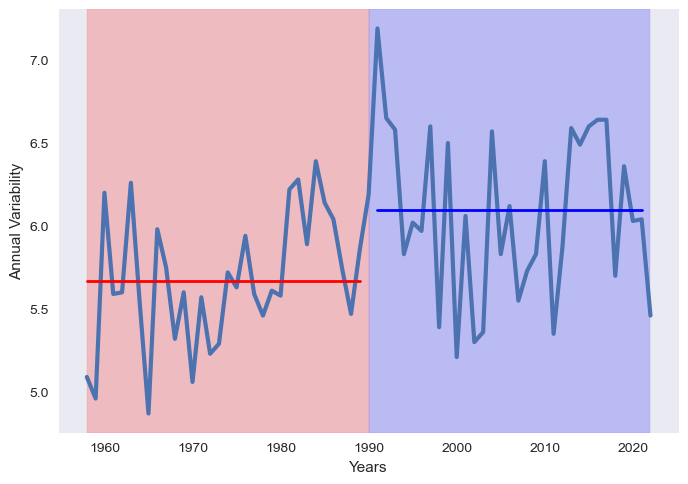

In [28]:
plt.plot(unique_years, annual_variability, linewidth = 3)
plt.plot(unique_years[0:half_year], first_half_mean_annual_variabilty, linewidth = 2, color = 'r')
plt.plot(unique_years[half_year +1 : len(unique_years)-1], second_half_mean_annual_variabilty, linewidth = 2, color = 'b')
plt.xlabel('Years')
plt.ylabel('Annual Variability')
plt.style.use('seaborn')
plt.grid()
plt.axvspan(unique_years[0], unique_years[half_year], color='red', alpha=0.2)
plt.axvspan(unique_years[half_year], unique_years[len(unique_years)-1], color='blue', alpha=0.2)
plt.show()

## Is the difference significant at the 95% confidence limits?

### The comparison of confidence intervals of two halves of the variability data set can provide information about the stability of the emissions over time. By dividing the data set into two halves and calculating the confidence intervals for each half, we can see how much the mean values of the two halves deviate from each other and get an idea of the level of variability in the data. A small confidence interval for both halves of the data would indicate that the mean values of the two halves are stable and the variability in the data is low, while large confidence intervals would indicate that the mean values of the two halves are highly variable and that there is a significant amount of variability in the data. The comparison of the confidence intervals of the two halves of the data can be used to assess the stability of the CO2 emissions over time and help to identify any trends or patterns in the data.

In [29]:
#calculation of confidence level interval
z = 1.96 # z factor for 95% confidence level is 1.96

values = annual_variability[0:half_year]
mean = statistics.mean(values)
stdev = statistics.stdev(values)
confidence_interval_1 = z * stdev / sqrt(len(values))
print(f"confidence interval of first of annual variability = {confidence_interval_1}.")

confidence interval of first of annual variability = 0.13785148373354658.


In [30]:
values = annual_variability[half_year:len(unique_years)-1]
mean = statistics.mean(values)
stdev = statistics.stdev(values)
confidence_interval_2 = z * stdev / sqrt(len(values))
print(f"confidence interval of second of annual variability = {confidence_interval_2}.")

confidence interval of second of annual variability = 0.1725489093239091.


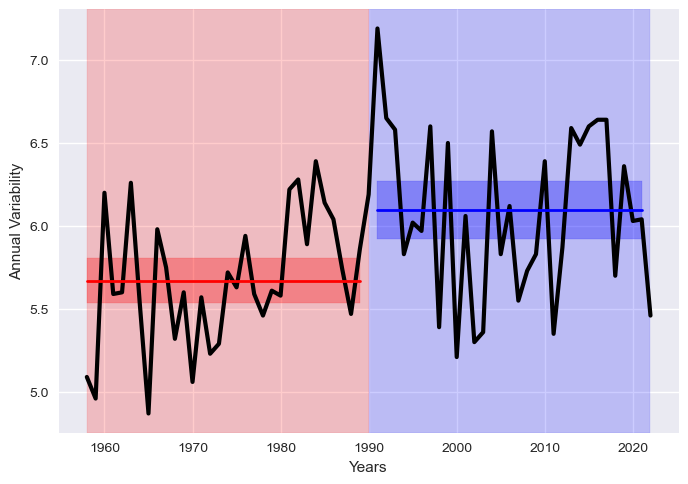

In [31]:
plt.plot(unique_years, annual_variability, linewidth = 3, color = 'black')

plt.plot(unique_years[0:half_year], first_half_mean_annual_variabilty, linewidth = 2, color = 'r')
plt.fill_between(unique_years[0:half_year], 
                 (first_half_mean_annual_variabilty[0] - confidence_interval_1),
                 (first_half_mean_annual_variabilty[0] + confidence_interval_1),
                 color = 'r', alpha = 0.3)

plt.plot(unique_years[half_year+1: len(unique_years)-1], second_half_mean_annual_variabilty, linewidth = 2, color = 'b')
plt.fill_between(unique_years[half_year+1: len(unique_years)-1],
                 (second_half_mean_annual_variabilty[0] - confidence_interval_2),
                 (second_half_mean_annual_variabilty[0] + confidence_interval_2),
                 color = 'b', alpha = 0.3)


plt.xlabel('Years')
plt.ylabel('Annual Variability')
plt.style.use('seaborn')
plt.axvspan(unique_years[0], unique_years[half_year], color='red', alpha=0.2)
plt.axvspan(unique_years[half_year], unique_years[len(unique_years)-1], color='blue', alpha=0.2)
plt.show()

#### Here, the confidence intervals of two halves of the data set don't overlap, it would suggest that there is a significant difference in the annual variation of CO2 concentrations over the two time periods. This could indicate that there are underlying factors that are driving the differences, such as changes in human activities, natural processes, or other factors.

# **Question 2**: 

### Remove the “noise” in the data associated with the long term rise in CO2 concentration. You can do this by fitting a polynomial to the data. Try a first order (linear), second order (quadratic) and higher order fits (maybe to 5th order) and describe how this changes your results.

## Linear regression fitting

In [32]:
# convert year and month into a single datetime column
df = pd.to_datetime(keeling_curve['Year'].astype(str) + '-' + keeling_curve['Months'].astype(str), format='%Y-%m')
df = df.dt.year + df.dt.month/12
x = df
y = np.array(keeling_curve['Monthly mean CO2 concentration']).astype(int)
x

2      1958.250000
3      1958.333333
4      1958.416667
5      1958.500000
6      1958.583333
          ...     
773    2022.500000
774    2022.583333
775    2022.666667
776    2022.750000
777    2022.833333
Length: 776, dtype: float64

In [33]:
from sklearn.linear_model import LinearRegression

x = np.array(x)                        # unique_years is the x array which is going to act as input
y = np.array(y)                        # annual_variability is the variable to be predicted

model = LinearRegression()

model.fit(x.reshape(-1,1),y)                      # x has to be converted to 2d array if not already

y_regression = model.predict(x.reshape(-1,1))     # x has to be converted to 2d array if its 1d array.

# plt.scatter(x,y)

# plt.plot(unique_years, y_regression)

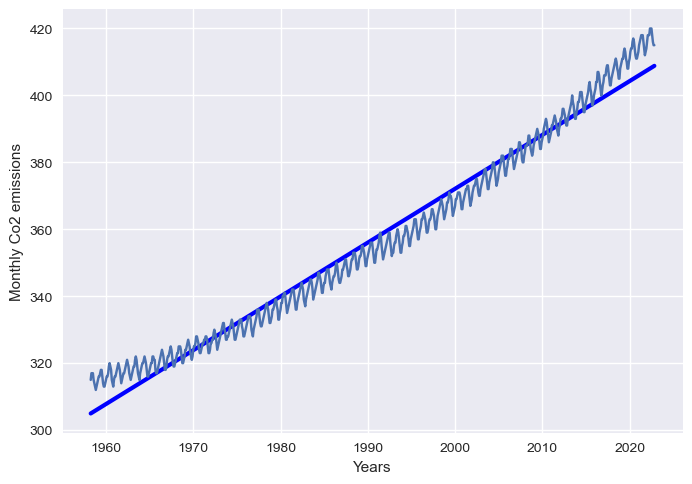

In [34]:
plt.plot(x, y_regression, linewidth=3, color = 'b')
# plt.scatter(x,y)
plt.plot(x, y)
plt.xlabel('Years')
plt.ylabel('Monthly Co2 emissions')
# plt.axhline(y=annual_variability.mean(), color = 'g', linestyle = ':', linewidth = 3 )
plt.show()

 ## Second order polynomial fit

In [35]:
y = np.array(keeling_curve['Monthly mean CO2 concentration']).astype(int)

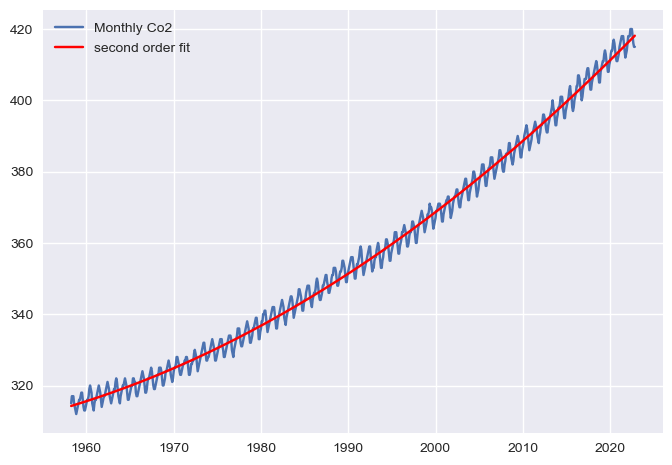

In [36]:
second_order_fit_coeff = np.polyfit(x, y, deg = 2)
second_order_fit = np.polyval(second_order_fit_coeff, x)
fig, ax = plt.subplots()
ax.plot(x, y, label='Monthly Co2')
ax.plot(x, second_order_fit, color = 'r',label='second order fit')
ax.legend()

 ## Third order polynomial fit

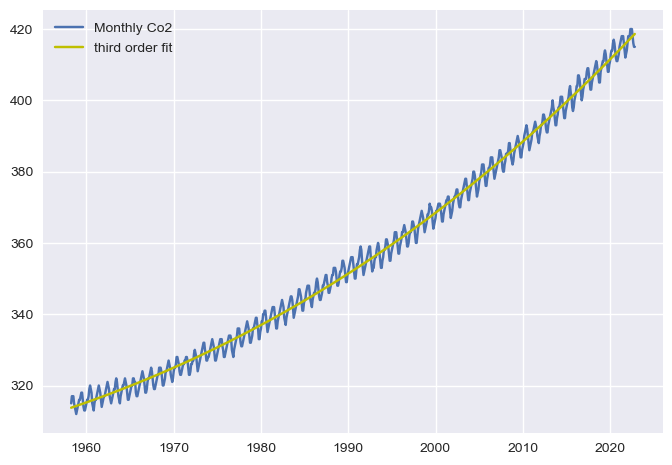

In [37]:
third_order_fit_coeff = np.polyfit(x, y, deg = 3)
third_order_fit = np.polyval(third_order_fit_coeff, x)
fig, ax = plt.subplots()
ax.plot(x, y, label='Monthly Co2')
ax.plot(x, third_order_fit, color = 'y',label='third order fit')
ax.legend()

 ## Fourth order polynomial fit

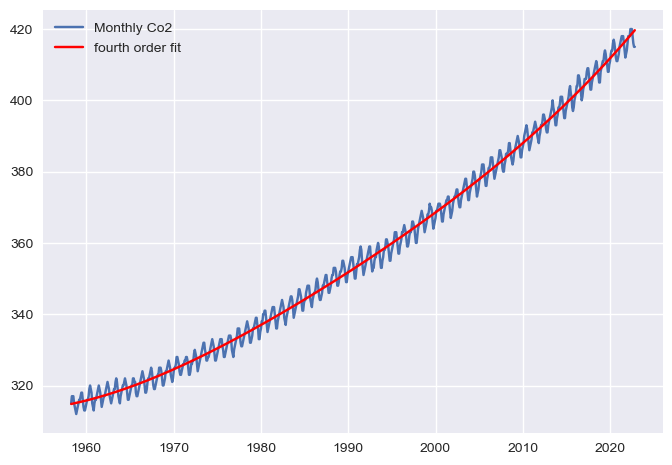

In [38]:
fourth_order_fit_coeff = np.polyfit(x, y, deg = 4)
fourth_order_fit = np.polyval(fourth_order_fit_coeff, x)
fig, ax = plt.subplots()
ax.plot(x, y, label='Monthly Co2')
ax.plot(x, fourth_order_fit, color = 'r',label='fourth order fit')
ax.legend()

 ## Fifth order polynomial fit

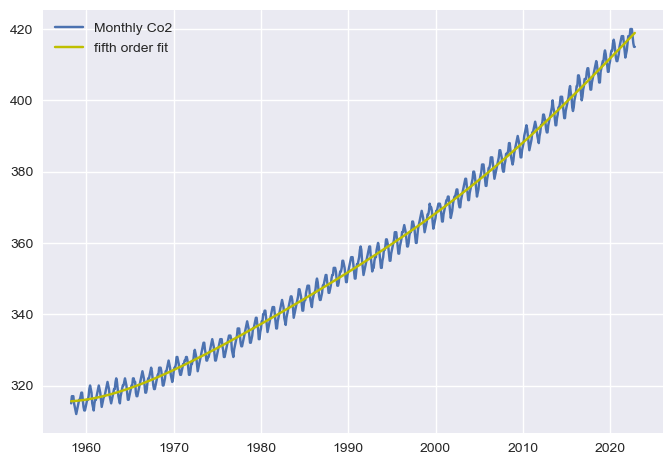

In [39]:
fifth_order_fit_coeff = np.polyfit(x, y, deg = 5)
fifth_order_fit = np.polyval(fifth_order_fit_coeff, x)
fig, ax = plt.subplots()
ax.plot(x, y, label='Monthly Co2')
ax.plot(x, fifth_order_fit, color = 'y',label='fifth order fit')
ax.legend()

## Subtract the polynomial fit from the raw data to remove the long-term trend and isolate the annual variation in the data.

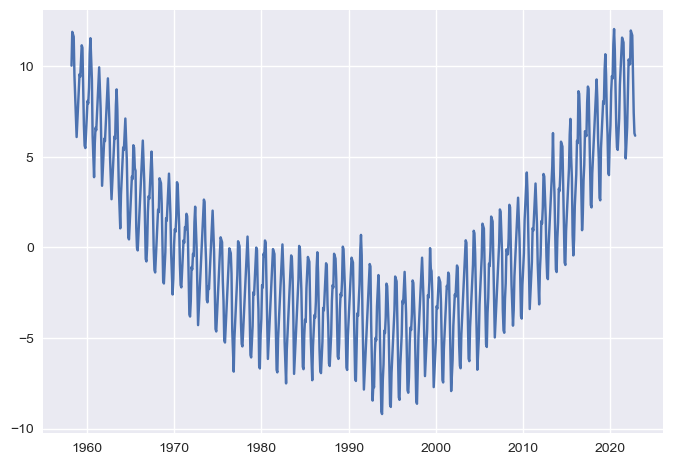

In [40]:
first_order_fit_variability = y - y_regression
plt.plot(x, first_order_fit_variability)
# plt.axhline(first_order_fit_variability.mean())

In [41]:
def plot_confidence_interval(x, variability, confidence_level=0.95):
    z = 1.96  # z factor for 95% confidence level is 1.96

    half_data_set = int((len(x)-1)/2)
    values = variability[0:half_data_set]

    global first_half_mean_variabilty
    first_half_mean_variabilty = variability[0:half_data_set+1].mean()
    
    global second_half_mean_variabilty
    second_half_mean_variabilty = variability[half_data_set : len(x)-1].mean()

    first_half_mean_variabilty = np.repeat(first_half_mean_variabilty, len(x[0:half_data_set+1]))
    second_half_mean_variabilty = np.repeat(second_half_mean_variabilty, len(x[half_data_set : len(x)-1]))


    stdev = statistics.stdev(values)
    global confidence_interval_1
    confidence_interval_1 = z * stdev / np.sqrt(len(values))
    print(f"confidence interval of first of annual variability = {confidence_interval_1}.")

    values = variability[half_data_set:len(x)-1]
    stdev = statistics.stdev(values)
    global confidence_interval_2
    confidence_interval_2 = z * stdev / np.sqrt(len(values))
    print(f"confidence interval of second of annual variability = {confidence_interval_2}.")


    plt.plot(x, variability, linewidth = 1, color = 'black')

    plt.plot(x[0:half_data_set+1], first_half_mean_variabilty, linewidth = 2, color = 'r')
    plt.fill_between(x[0:half_data_set+1], 
                     (first_half_mean_variabilty[0] - confidence_interval_1),
                     (first_half_mean_variabilty[0] + confidence_interval_1),
                     color = 'r', alpha = 0.3)

    plt.plot(x[half_data_set: len(x)-1], second_half_mean_variabilty, linewidth = 2, color = 'b')
    plt.fill_between(x[half_data_set: len(x)-1],
                     (second_half_mean_variabilty[0] - confidence_interval_2),
                     (second_half_mean_variabilty[0] + confidence_interval_2),
                     color = 'b', alpha = 0.3)

    plt.xlabel('Years')
    plt.ylabel('Annual Residual Variability')
    plt.style.use('seaborn')
    plt.axvspan(x[0], x[half_data_set], color='red', alpha=0.2)
    plt.axvspan(x[half_data_set], x[len(x)-1], color='blue', alpha=0.2)
    plt.show()

## Calculaing Annual Variability of residual

In [42]:
time = pd.to_datetime(keeling_curve['Year'].astype(str) + '-' + keeling_curve['Months'].astype(str), format='%Y-%m')

In [43]:
df1 = pd.DataFrame({'residual': first_order_fit_variability, 'time': time})

In [44]:
df1

,residual,time
2,10.031366,1958-03-01
3,11.897347,1958-04-01
4,11.763329,1958-05-01
5,11.629310,1958-06-01
6,9.495292,1958-07-01
...,...,...
773,11.703162,2022-06-01
774,9.569143,2022-07-01
775,7.435125,2022-08-01
776,6.301106,2022-09-01


In [45]:
df1['year'] = pd.to_datetime(df1['time']).dt.year

In [46]:
df1

,residual,time,year
2,10.031366,1958-03-01,1958
3,11.897347,1958-04-01,1958
4,11.763329,1958-05-01,1958
5,11.629310,1958-06-01,1958
6,9.495292,1958-07-01,1958
...,...,...,...
773,11.703162,2022-06-01,2022
774,9.569143,2022-07-01,2022
775,7.435125,2022-08-01,2022
776,6.301106,2022-09-01,2022


In [47]:
grouped = df1.groupby('year')
max_residuals = grouped['residual'].max()
min_residuals = grouped['residual'].min()


### The difference between the maximum and minimum residuals for a given year for the entire time frame represents the annual variation in the residual data. This information can be used to assess the magnitude of the annual variability in the residual data, which represents the deviation from the long-term trend that you have modeled with the polynomial fit. By analyzing the annual variation in the residual data, you can determine if there are any patterns or trends in the deviation from the long-term trend, which can provide insight into the underlying processes that are contributing to the variability in the data.

In [48]:
first_order_fit_annual_variability = np.array(max_residuals - min_residuals)


confidence interval of first of annual variability = 0.20555964766995177.
confidence interval of second of annual variability = 0.21268625248312262.


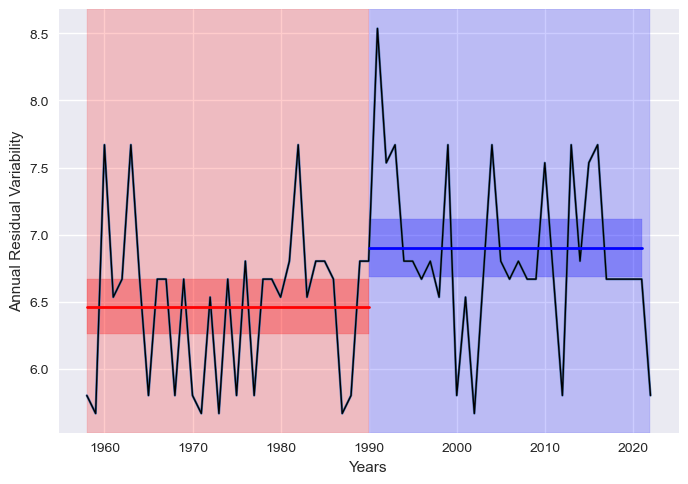

In [49]:
plt.plot(list(unique_years), first_order_fit_annual_variability)
plot_confidence_interval(list(unique_years), first_order_fit_annual_variability)

data1_first_order =  [first_half_mean_variabilty[0] - confidence_interval_1, first_half_mean_variabilty[0], 
          first_half_mean_variabilty[0] + confidence_interval_1]

data2_first_order =  [second_half_mean_variabilty[0] - confidence_interval_2, second_half_mean_variabilty[0], 
          second_half_mean_variabilty[0] + confidence_interval_2]

In [50]:
second_order_fit_variability = y - second_order_fit

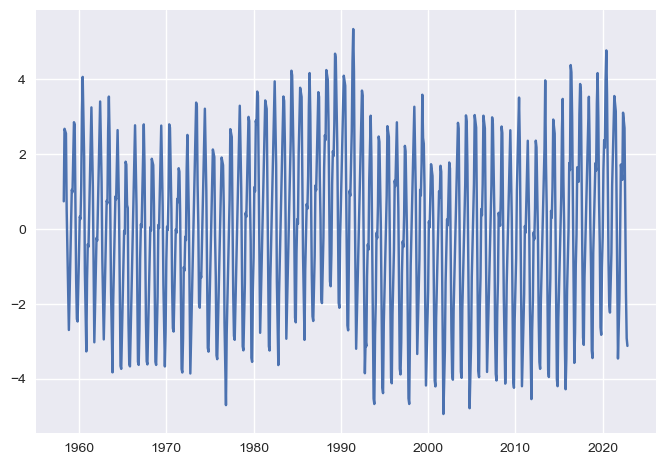

In [51]:
# plt.plot(x, second_order_fit_variability)

confidence interval of first of annual variability = 0.21350650453117773.
confidence interval of second of annual variability = 0.20703221999241092.


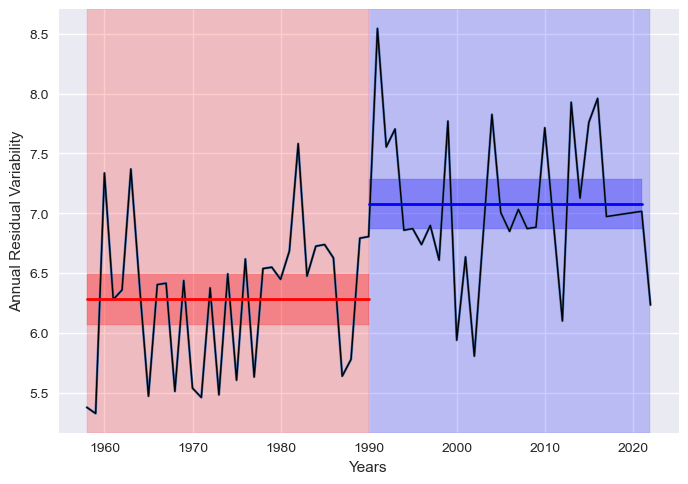

In [52]:
df2 = pd.DataFrame({'residual': second_order_fit_variability, 'time': time})
df2['year'] = pd.to_datetime(df2['time']).dt.year

grouped = df2.groupby('year')
max_residuals = grouped['residual'].max()
min_residuals = grouped['residual'].min()

second_order_fit_annual_variability = np.array(max_residuals - min_residuals)

plt.plot(list(unique_years), second_order_fit_annual_variability)
plot_confidence_interval(list(unique_years), second_order_fit_annual_variability)

data1_second_order =  [first_half_mean_variabilty[0] - confidence_interval_1, first_half_mean_variabilty[0], 
          first_half_mean_variabilty[0] + confidence_interval_1]

data2_second_order =  [second_half_mean_variabilty[0] - confidence_interval_2, second_half_mean_variabilty[0], 
          second_half_mean_variabilty[0] + confidence_interval_2]

In [ ]:
## Third order Annual Residual Variability

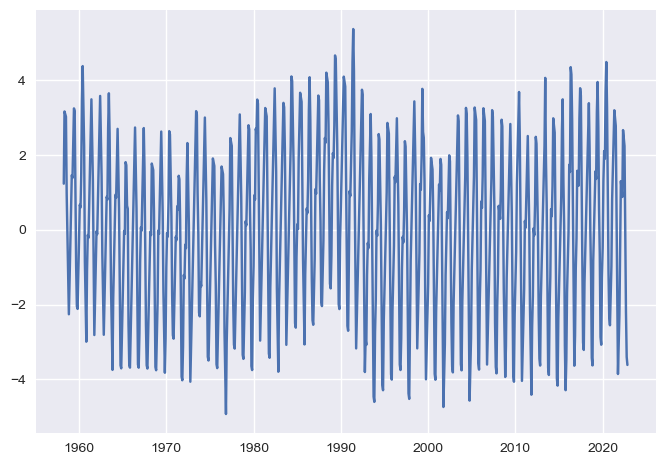

In [53]:
third_order_fit_variability = y - third_order_fit
# plt.plot(x, third_order_fit_variability)

confidence interval of first of annual variability = 0.21235876428578415.
confidence interval of second of annual variability = 0.20740773420138564.


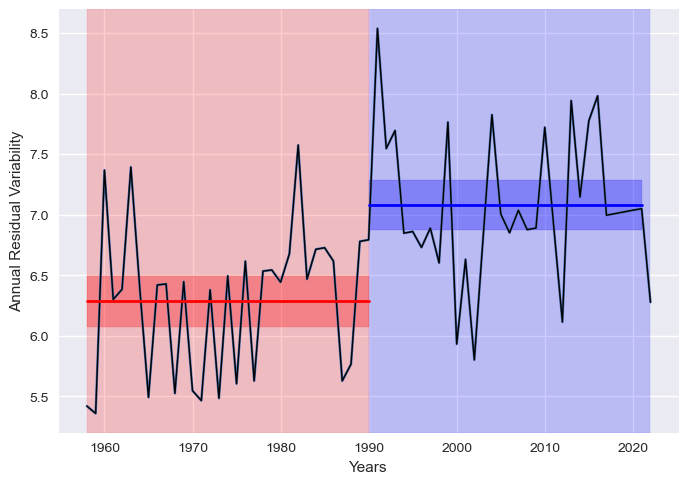

In [54]:
df3 = pd.DataFrame({'residual': third_order_fit_variability, 'time': time})
df3['year'] = pd.to_datetime(df3['time']).dt.year

grouped = df3.groupby('year')
max_residuals = grouped['residual'].max()
min_residuals = grouped['residual'].min()

third_order_fit_annual_variability = np.array(max_residuals - min_residuals)

plt.plot(list(unique_years), third_order_fit_annual_variability)
plot_confidence_interval(list(unique_years), third_order_fit_annual_variability)

data1_third_order =  [first_half_mean_variabilty[0] - confidence_interval_1, first_half_mean_variabilty[0], 
          first_half_mean_variabilty[0] + confidence_interval_1]

data2_third_order =  [second_half_mean_variabilty[0] - confidence_interval_2, second_half_mean_variabilty[0], 
          second_half_mean_variabilty[0] + confidence_interval_2]

## Fourth order Annual Residual Variability

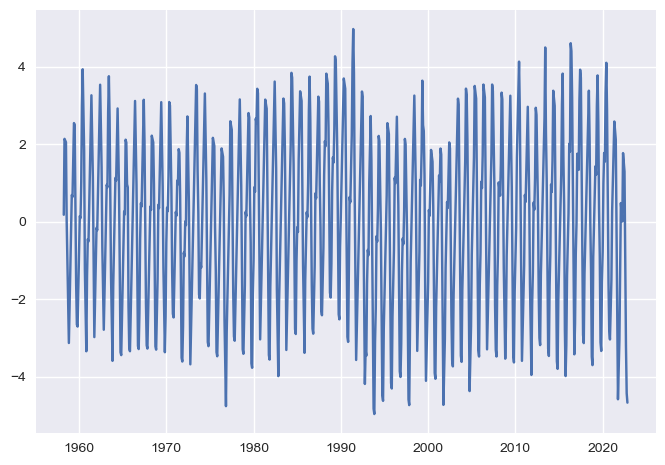

In [55]:
fourth_order_fit_variability = y - fourth_order_fit
plt.plot(x, fourth_order_fit_variability)

confidence interval of first of annual variability = 0.2148748781409511.
confidence interval of second of annual variability = 0.2099581947788908.


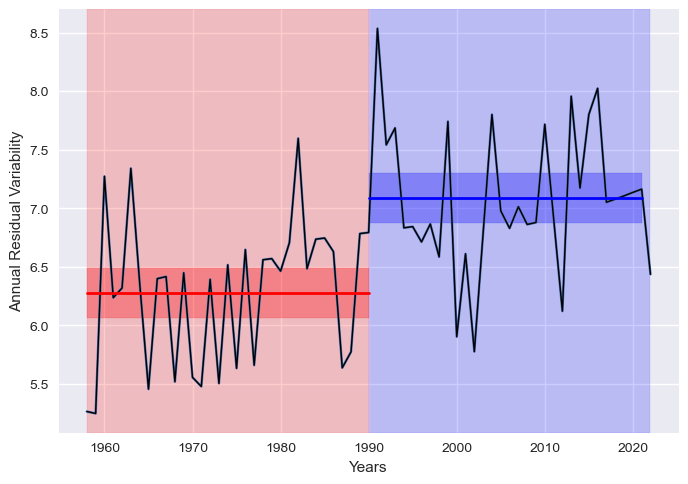

In [56]:
df4 = pd.DataFrame({'residual': fourth_order_fit_variability, 'time': time})
df4['year'] = pd.to_datetime(df4['time']).dt.year

grouped = df4.groupby('year')
max_residuals = grouped['residual'].max()
min_residuals = grouped['residual'].min()

fourth_order_fit_annual_variability = np.array(max_residuals - min_residuals)

plt.plot(list(unique_years), fourth_order_fit_annual_variability)
plot_confidence_interval(list(unique_years), fourth_order_fit_annual_variability)

data1_fourth_order =  [first_half_mean_variabilty[0] - confidence_interval_1, first_half_mean_variabilty[0], 
          first_half_mean_variabilty[0] + confidence_interval_1]

data2_fourth_order =  [second_half_mean_variabilty[0] - confidence_interval_2, second_half_mean_variabilty[0], 
          second_half_mean_variabilty[0] + confidence_interval_2]

## Fifth order Annual Residual Variability 

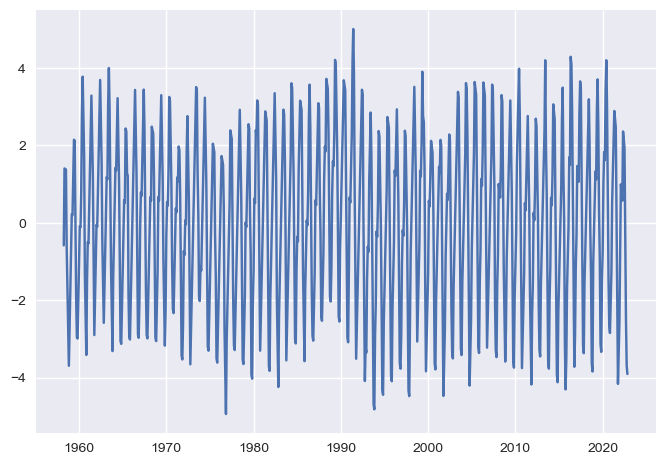

In [57]:
fifth_order_fit_variability = y - fifth_order_fit
plt.plot(x, fifth_order_fit_variability)

confidence interval of first of annual variability = 0.21670763371033358.
confidence interval of second of annual variability = 0.20883201184863057.


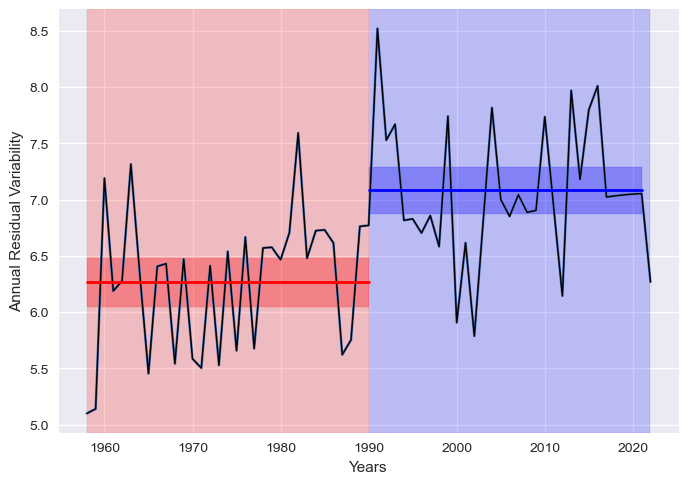

In [58]:
df5 = pd.DataFrame({'residual': fifth_order_fit_variability, 'time': time})
df5['year'] = pd.to_datetime(df5['time']).dt.year

grouped = df5.groupby('year')
max_residuals = grouped['residual'].max()
min_residuals = grouped['residual'].min()

fifth_order_fit_annual_variability = np.array(max_residuals - min_residuals)

plt.plot(list(unique_years), fifth_order_fit_annual_variability)
plot_confidence_interval(list(unique_years), fifth_order_fit_annual_variability)

data1_fifth_order =  [first_half_mean_variabilty[0] - confidence_interval_1, first_half_mean_variabilty[0], 
          first_half_mean_variabilty[0] + confidence_interval_1]

data2_fifth_order =  [second_half_mean_variabilty[0] - confidence_interval_2, second_half_mean_variabilty[0], 
          second_half_mean_variabilty[0] + confidence_interval_2]

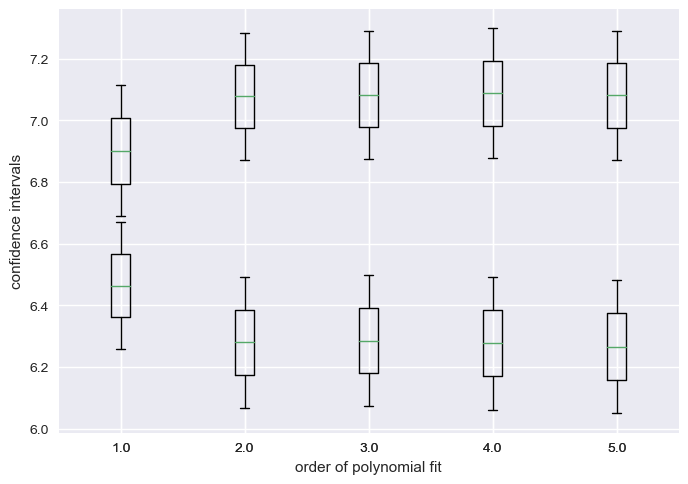

In [61]:
fig = plt.figure()
ax = fig.add_subplot(111)
ax.boxplot(data1_first_order, positions = [1.0],showfliers=False, showmeans=False, showcaps=True, showbox=True, whiskerprops={'linewidth':1})
ax.boxplot(data2_first_order, positions = [1.0],showfliers=False, showmeans=False, showcaps=True, showbox=True, whiskerprops={'linewidth':1})
ax.boxplot(data1_second_order, positions = [2.0], showfliers=False, showmeans=False, showcaps=True, showbox=True, whiskerprops={'linewidth':1})
ax.boxplot(data2_second_order, positions = [2.0], showfliers=False, showmeans=False, showcaps=True, showbox=True, whiskerprops={'linewidth':1})
ax.boxplot(data1_third_order, positions = [3.0], showfliers=False, showmeans=False, showcaps=True, showbox=True, whiskerprops={'linewidth':1})
ax.boxplot(data2_third_order, positions = [3.0], showfliers=False, showmeans=False, showcaps=True, showbox=True, whiskerprops={'linewidth':1})

ax.boxplot(data1_fourth_order, positions = [4.0], showfliers=False, showmeans=False, showcaps=True, showbox=True, whiskerprops={'linewidth':1})
ax.boxplot(data2_fourth_order, positions = [4.0], showfliers=False, showmeans=False, showcaps=True, showbox=True, whiskerprops={'linewidth':1})
ax.boxplot(data1_fifth_order, positions = [5.0], showfliers=False, showmeans=False, showcaps=True, showbox=True, whiskerprops={'linewidth':1})
ax.boxplot(data2_fifth_order, positions = [5.0], showfliers=False, showmeans=False, showcaps=True, showbox=True, whiskerprops={'linewidth':1})
plt.ylabel('confidence intervals')
plt.xlabel('order of polynomial fit')
plt.show()

### We can see that confidence intervals aren't overlaping, it suggests that there is a significant difference between the two halves. This indicates a change in the annual variation of the data, possibly due to some external factor such as human intervention. However, further analysis is needed to determine the cause of the difference and whether it is statistically significant. Possible proposed method would be to compare this residual variability with the data related to natural phenomenon like volcano erruption and if it follow the same trend that would means that the change behind this variability spike is due to natural cause otherwise it be from Human intervention. 

### We can also see how the gap between confidence intervals is minimum when the order of polynomial fit is one and how it start increasing with increasing the order of the fit, but it slightly started decreased when order of polynomial fit hits 5th order. This can be explained as if at the lower order of polynomial fit, it wasn't able to fit well so it was losing long trend signals and considered as under-fit resulted in narrow and high bias confidence interval. While at the higer orders say 5, the polynomial starts resolving the annual signals or noise or in other words starts fitting noise instead long trend, that's why we see decrease in confidence interval gap at higher orders. So, it would be a tradeoff that we have to decide between high variance and high bias. In this case second order or third order polynomial fit seems pretty promising. 